# Project Title - Multiclass Fish Image Classification

## Problem Statement - 
- This project focuses on classifying fish images into multiple categories using deep learning models. The task involves training a CNN from scratch and leveraging transfer learning with pre-trained models to enhance performance. The project also includes saving models for later use and deploying a Streamlit application to predict fish categories from user-uploaded images

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import tensorflow as tf

## Define Constants

In [2]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
# CHANNELS = 3
EPOCHS = 50
# input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 11

## Load Training Dataset

In [3]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../data/train",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 6225 files belonging to 11 classes.


In [4]:
class_names = train_dataset.class_names
class_names

['animal fish',
 'animal fish bass',
 'fish sea_food black_sea_sprat',
 'fish sea_food gilt_head_bream',
 'fish sea_food hourse_mackerel',
 'fish sea_food red_mullet',
 'fish sea_food red_sea_bream',
 'fish sea_food sea_bass',
 'fish sea_food shrimp',
 'fish sea_food striped_red_mullet',
 'fish sea_food trout']

In [5]:
len(class_names)

11

In [6]:
len(train_dataset)

195

## Preview Images

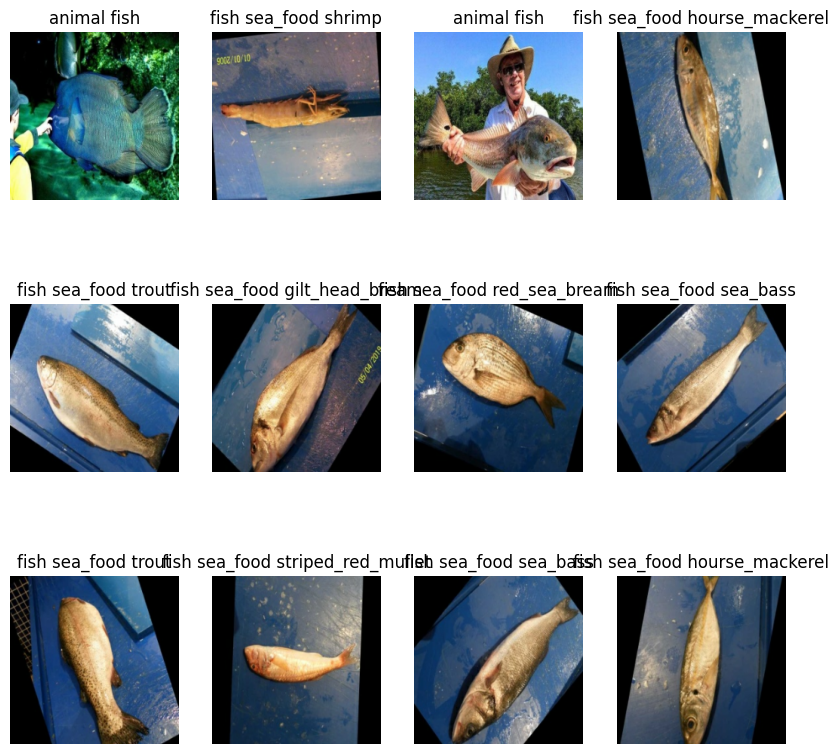

In [7]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

## Load Test Dataset

In [8]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../data/test",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 3187 files belonging to 11 classes.


In [9]:
class_names = train_dataset.class_names
class_names

['animal fish',
 'animal fish bass',
 'fish sea_food black_sea_sprat',
 'fish sea_food gilt_head_bream',
 'fish sea_food hourse_mackerel',
 'fish sea_food red_mullet',
 'fish sea_food red_sea_bream',
 'fish sea_food sea_bass',
 'fish sea_food shrimp',
 'fish sea_food striped_red_mullet',
 'fish sea_food trout']

In [10]:
len(class_names)

11

## Load Validation Dataset

In [11]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../data/val",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 1092 files belonging to 11 classes.


| Level   | Value       |
| ------- | ----------- |
| Level 1 | fish        |
| Level 2 | sea\_food   |
| Level 3 | red\_mullet |

### Split into components

In [12]:
rows = []
for text, _ in train_dataset:
    words = str(text.numpy()).split()
    truncated = words[:3] + [''] * (3 - len(words)) 
    rows.append(truncated)

### Convert to dataframe

In [13]:
df = pd.DataFrame(rows, columns=["Level1", "Level2", "Level3"])

## 1. Count of Items per Level 1 Category

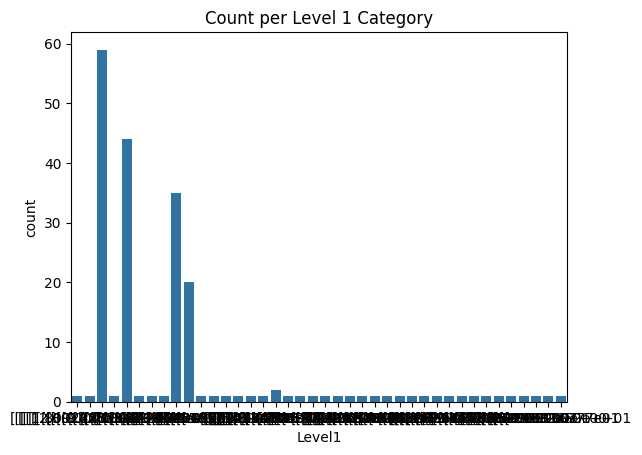

In [14]:
sns.countplot(data=df, x='Level1')
plt.title('Count per Level 1 Category')
plt.savefig("../results/plots/data-viz/Count_of_Items_per_Level_1_Category.png")
plt.show()

## 2. 🍤 Count per Level 2 (e.g., sea_food)

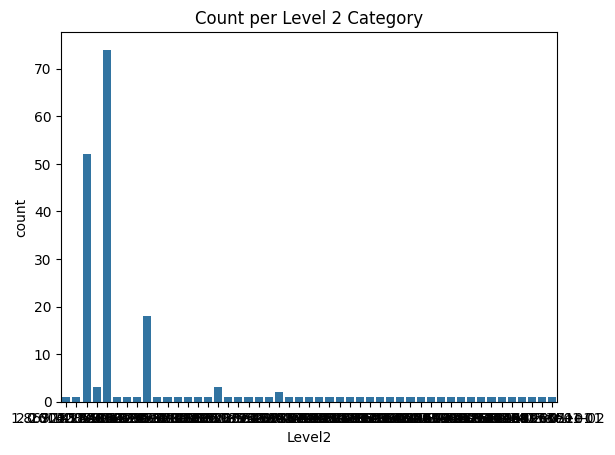

In [15]:
sns.countplot(data=df[df['Level2'] != ''], x='Level2')
plt.title('Count per Level 2 Category')
plt.savefig("../results/plots/data-viz/Count_of_Items_per_Level_2_Category.png")
plt.show()

## 3. 🐟 Fish Types (Level 3) Distribution

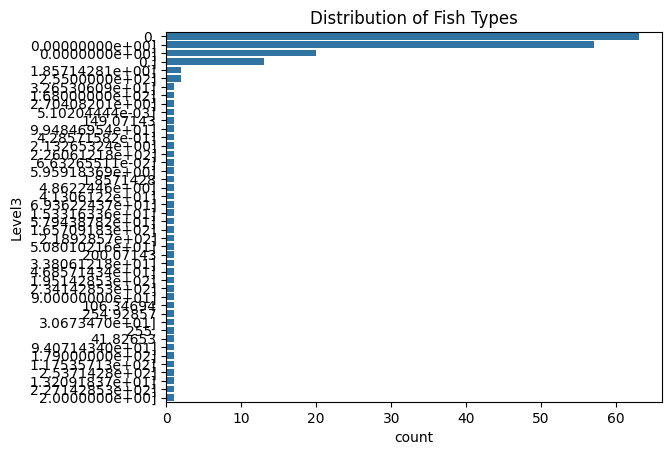

In [16]:
fish_only = df[df['Level3'] != '']
sns.countplot(data=fish_only, y='Level3', order=fish_only['Level3'].value_counts().index)
plt.title('Distribution of Fish Types')
plt.savefig("../results/plots/data-viz/Count_of_Items_per_Level_3_Category.png")
plt.show()


## 4 : Interactive Sunburst Chart (Hierarchy Visualization)

In [17]:
fig1 = px.sunburst(
    df,
    path=["Level1", "Level2", "Level3"],
    title="Category Hierarchy (Sunburst Chart)"
)
fig1.write_image("../results/plots/data-viz/Hierarchy_Visualization.png")
fig1.show()

## What it does:
- Shows the breakdown of categories from Level1 → Level2 → Level3 like a radial tree.

- Hover to see counts and paths interactively

## 5: Interactive Bar Chart (Top Fish Types at Level 3)

In [19]:
df_level3 = df[df["Level3"] != ""]

# Get value counts and rename columns
level3_counts = df_level3["Level3"].value_counts().reset_index()
level3_counts.columns = ["Level3", "count"]

# Plot
fig2 = px.bar(
    level3_counts,
    x="Level3",
    y="count",
    labels={"Level3": "Fish Type", "count": "Count"},
    title="Fish Types Frequency (Level 3)"
)
fig2.write_image("../results/plots/data-viz/Top_Fish_Types_at_Level_3.png")
fig2.show()

## What it does:
- Displays a bar chart showing frequency of each fish/seafood type.

- Hover and zoom enabled for large datasets.


# 🐟 Interactive Category Visualization from Hierarchical Dataset

This project involves preprocessing and visualizing a dataset of fish and seafood categories that are structured in a hierarchical text format (e.g., `"fish sea_food trout"`). The goal is to explore and interactively visualize the relationships between high-level and specific fish types using Plotly.

---

## 📁 Dataset Overview

The dataset consists of tuples in a TensorFlow format like:

```python
(b"fish sea_food trout", label)
```

Each item is a category path with one to three levels:
- **Level 1**: Broad category (e.g., `animal`, `fish`)
- **Level 2**: Sub-category (e.g., `sea_food`)
- **Level 3**: Specific type (e.g., `shrimp`, `trout`)

---

## 🧹 Preprocessing Steps

1. **Tensor Conversion**: Since the dataset is in TensorFlow (`EagerTensor`), each string is converted using:

```python
str(text.numpy().decode("utf-8"))
```

2. **Tokenization**: Each string is split into words using `.split()`.

3. **Truncation/Padding**: To ensure consistent formatting, each label is limited to 3 levels. Missing levels are filled with empty strings.

4. **DataFrame Construction**: A pandas `DataFrame` is created with columns: `Level1`, `Level2`, `Level3`.

---

## 📊 Visualization 1: Sunburst Chart

An interactive **sunburst chart** is created using Plotly to show the full category hierarchy:

```python
fig1 = px.sunburst(df, path=["Level1", "Level2", "Level3"], title="Category Hierarchy")
fig1.show()
```

✅ This chart allows zooming and hovering to explore how specific fish types fall under broader categories.

---

## 📊 Visualization 2: Bar Chart of Fish Type Frequency

A bar chart displays how often each specific fish type (Level 3) appears in the dataset:

```python
level3_counts = df[df["Level3"] != ""]["Level3"].value_counts().reset_index()
level3_counts.columns = ["Level3", "count"]

fig2 = px.bar(level3_counts, x="Level3", y="count", title="Fish Types Frequency")
fig2.show()
```

✅ This allows quick insights into the most common types of fish or seafood.

---

## 💾 Saving Charts

Charts can be saved as:

- **Interactive HTML** (best for sharing):
  ```python
  fig.write_html("chart.html")
  ```

- **Static Images** (requires `kaleido`):
  ```python
  fig.write_image("chart.png")
  ```

---

## 📦 Dependencies

Make sure to install:

```bash
pip install pandas plotly kaleido
```

---

## ✅ Summary

- Extracted hierarchical labels from TensorFlow dataset.
- Parsed into Level1, Level2, and Level3.
- Visualized:
  - Full category hierarchy via sunburst.
  - Fish type distribution via bar chart.
- Saved charts for sharing and presentation.

This approach is useful for analyzing structured label data, taxonomy classification, and exploratory data analysis in machine learning datasets.
